# Transformações Geométricas com OpenCV

In [62]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [63]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

### Scaling

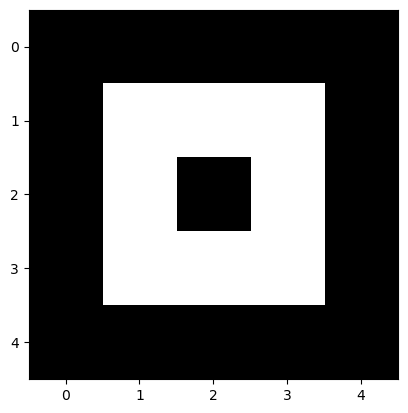

array([[  0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255.,   0.],
       [  0., 255.,   0., 255.,   0.],
       [  0., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.]])

In [64]:
toy_img = np.zeros((5,5))
toy_img[1:4, 1:4] = 255
toy_img[2:3, 2:3] = 0
toy_img[2:2, 2:3] = 255
plt.imshow(toy_img,cmap='gray')
plt.show()
toy_img

Parametros da função Resize()
- fx = fator no eixo x
- fy = fator no eixo y

A interpolação de parâmetros estima valores de pixel com base em pixels vizinhos. <code>INTER_NEAREST</code> usa o pixel mais próximo e <code>INTER_CUBIC</code> usa vários pixels próximos ao valor de pixel que gostaríamos de estimar.

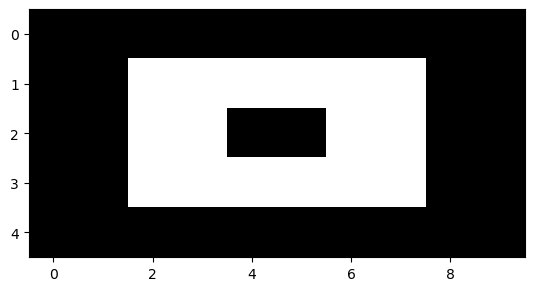

In [65]:
new_toy = cv2.resize(toy_img,  None, fx=2, fy=1, interpolation=cv2.INTER_NEAREST)
plt.imshow(new_toy, cmap="gray")
plt.show()

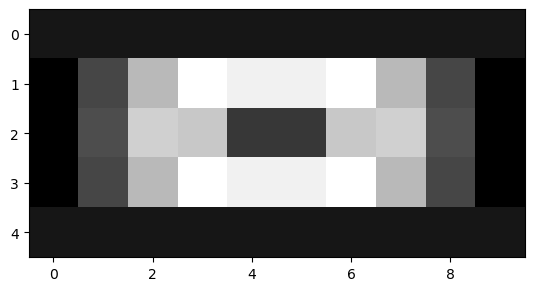

In [66]:
new_toy = cv2.resize(toy_img,  None, fx=2, fy=1, interpolation=cv2.INTER_CUBIC)
plt.imshow(new_toy, cmap="gray")
plt.show()

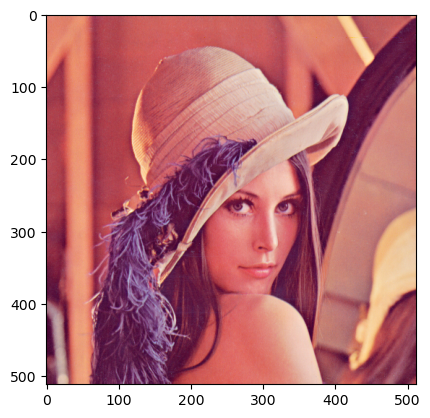

In [67]:
image = cv2.imread("./img/lenna.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

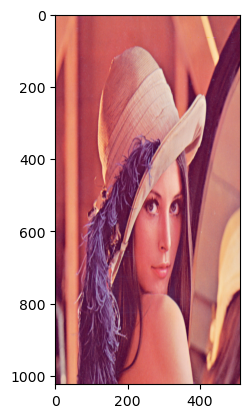

old image shape: (512, 512, 3) new image shape: (1024, 512, 3)


In [68]:
new_image = cv2.resize(image, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

reduzindo a imagem

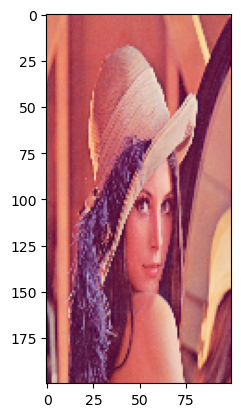

old image shape: (512, 512, 3) new image shape: (200, 100, 3)


In [69]:
new_image = cv2.resize(image, (100, 200), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", image.shape, "new image shape:", new_image.shape)

### Translação

<code>tx</code> é o número de pixels que você desloca a localização na direção horizontal e <code>ty</code> é o número de pixels que você desloca na direção vertical. Você pode criar a matriz de transformação $M$ para deslocar a imagem. Neste exemplo, deslocamos a imagem 100 pixels horizontalmente:

In [70]:
tx = 100
ty = 0
M = np.float32([[1, 0, tx], [0, 1, ty]])
M

array([[  1.,   0., 100.],
       [  0.,   1.,   0.]], dtype=float32)

In [71]:
rows, cols, _ = image.shape

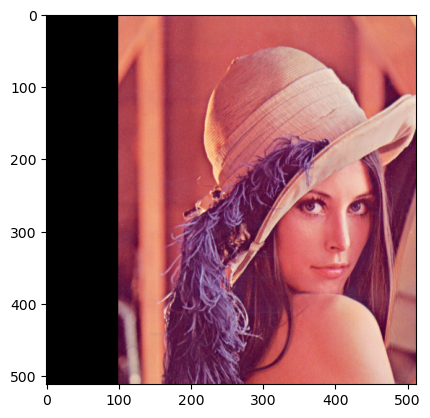

In [72]:
new_image = cv2.warpAffine(image, M, (cols, rows)) #Uma transformação que pode ser expressa na forma de uma multiplicação de matrizes (transformação linear) seguida de uma adição de vetores
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

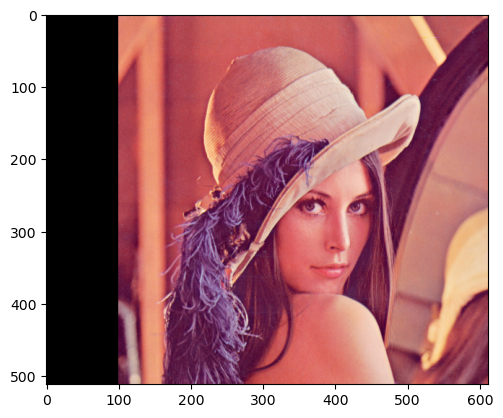

In [73]:
new_image = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

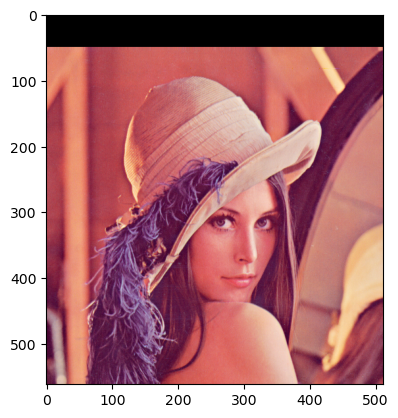

In [74]:
tx = 0
ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])
new_iamge = cv2.warpAffine(image, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_iamge, cv2.COLOR_BGR2RGB))
plt.show()

### Rotação

<p><code>center</code>: Center of the rotation in the source image. We will only use the center of the image.</p>
<p><code>angle</code>: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).</p>
<p><code>scale</code>: Isotropic scale factor, in this course the value will be one.</p>


In [82]:
theta = 45.0
M = cv2.getRotationMatrix2D(center=(1,1), angle=theta, scale=1)
new_toy_image = cv2.warpAffine(toy_img, M, (6, 6))

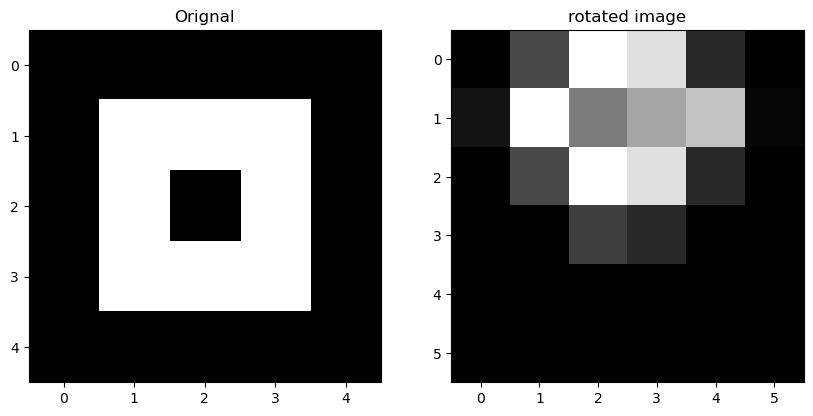

array([[  0.        ,  71.71875   , 255.        , 223.125     ,
         39.84375   ,   0.        ],
       [ 20.17089844, 255.        , 123.26660156, 165.10253906,
        195.234375  ,   6.22558594],
       [  0.        ,  71.71875   , 255.        , 223.125     ,
         39.84375   ,   0.        ],
       [  0.        ,   0.        ,  62.75390625,  39.84375   ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

In [76]:
plot_image(toy_img, new_toy_image, title_1="Orignal", title_2="rotated image")
new_toy_image

In [77]:
cols, rows, _ = image.shape

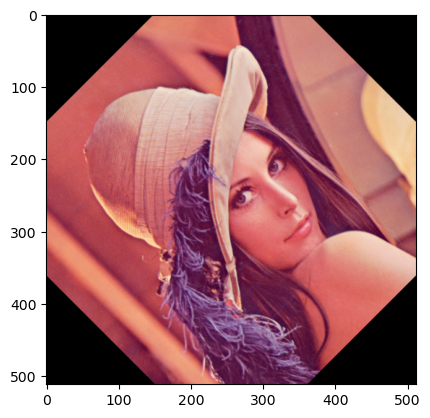

In [83]:

M = cv2.getRotationMatrix2D(center=(cols // 2 - 1, rows // 2 - 1), angle=theta, scale=1)
new_image = cv2.warpAffine(image, M, (cols, rows))

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()